In [1]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from scipy.stats import entropy
from sklearn.metrics import mutual_info_score
from matplotlib.animation import FuncAnimation

In [15]:
def get_data(i):
    # Simulate some data for the example
    x = np.random.randn(100) + i * 0.1
    y = np.random.randn(100) + i * 0.1
    return x, y

x_sample = get_data(i=1)
y_sample = get_data(i=1)
print(x_sample[0][0])
print(y_sample[0][0])

2.3465856400171323
0.03884318540193398


# Joint Probability

In [32]:
def scatter_hist(x, y, ax_main, ax_histx, ax_histy, step):
    # Clear the axes
    ax_main.clear()
    ax_histx.clear()
    ax_histy.clear()

    # Scatter plot
    ax_main.scatter(x, y)
    ax_main.axvline(np.mean(x), color='r', linestyle='--', linewidth=1, label='Mean X')
    ax_main.axhline(np.mean(y), color='g', linestyle='--', linewidth=1, label='Mean Y')
    ax_main.legend()
    ax_main.legend()
    ax_main.text(0.05, 0.95, f'Step: {int(step)}', transform=ax_main.transAxes, fontsize=12, verticalalignment='top')


    # Histograms
    ax_histx.hist(x, bins=30, alpha=0.7)
    ax_histx.axvline(np.mean(x), color='r', linestyle='--', linewidth=1)
    ax_histy.hist(y, bins=30, alpha=0.7, orientation='horizontal')
    ax_histy.axhline(np.mean(y), color='g', linestyle='--', linewidth=1)

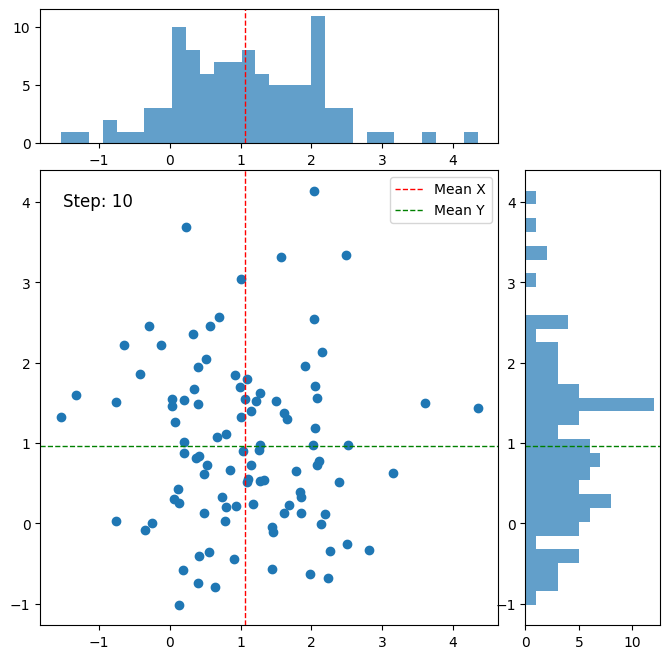

In [33]:
# Create the figure and axes
fig = plt.figure(figsize=(8, 8))
gs = fig.add_gridspec(4, 4)
ax_main = fig.add_subplot(gs[1:, :-1])
ax_histx = fig.add_subplot(gs[0, :-1], sharex=ax_main)
ax_histy = fig.add_subplot(gs[1:, -1], sharey=ax_main)

# To store the values of x and y
all_x = []
all_y = []

# Initial plot
x, y = get_data(0)
scatter_hist(x, y, ax_main, ax_histx, ax_histy, step=0)

# Animation update function
def update_join_prob(i):
    x, y = get_data(i)
    all_x.append(x)
    all_y.append(y)
    scatter_hist(x, y, ax_main, ax_histx, ax_histy, step=i)
    

# Create the animation with 10 steps
frames = np.linspace(0, 10, 10)
ani = animation.FuncAnimation(fig, update_join_prob, frames=frames, repeat=False)

# Save the animation with reduced velocity (lower fps)
ani.save('join_prob_animation.gif', writer='pillow', fps=2)

plt.show()

# Entropy and Mutual Information

In [18]:
# Calculate entropy
def compute_entropy(data):
    pdf, bins = np.histogram(data, bins=30, density=True)
    pdf += 1e-12  # Avoid taking log(0)
    entropy = -np.sum(pdf * np.log2(pdf) * np.diff(bins))
    return entropy

# Calculate mutual information
def compute_mutual_information(x, y):
    c_xy = np.histogram2d(x, y, bins=30)[0]
    c_xy += 1e-12  # Avoid zeros in mutual information computation
    mi = mutual_info_score(None, None, contingency=c_xy)
    return mi

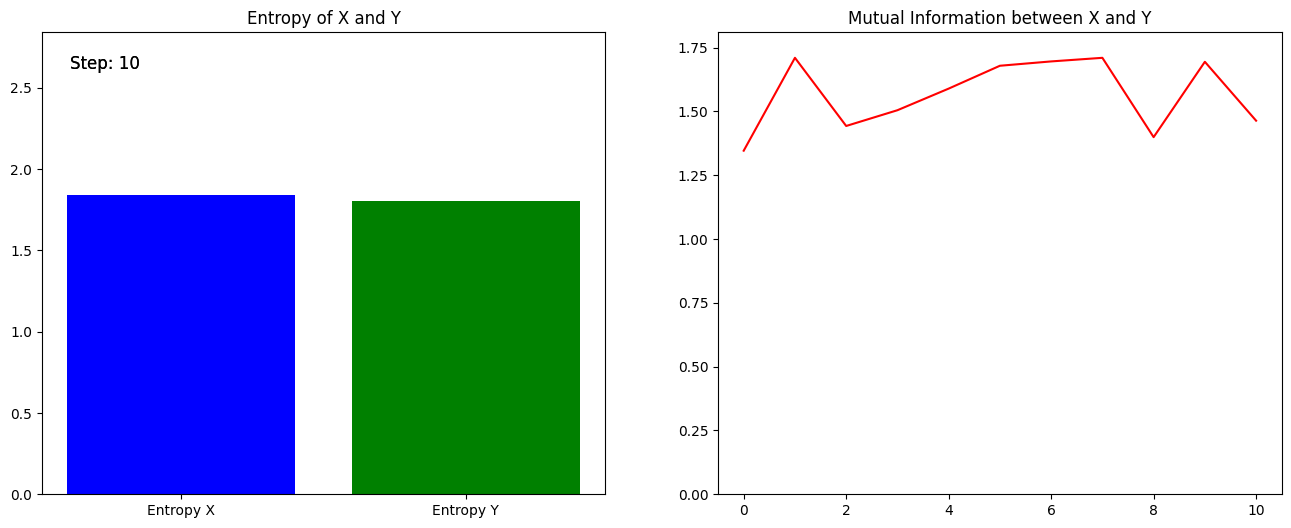

In [37]:
# Initialization function for the plots
def init():
    ax_bar.clear()
    ax_line.clear()
    ax_bar.bar(['Entropy X', 'Entropy Y'], [0, 0], color=['blue', 'green'])
    ax_line.plot([], [], color='red')
    return ax_bar, ax_line

# Update function for animation
def update(i):
    x = all_x[i]
    y = all_y[i]
    entropy_x = compute_entropy(x)
    entropy_y = compute_entropy(y)
    mi_xy = compute_mutual_information(x, y)
    
    # Update bar plot for entropy
    bars = [entropy_x, entropy_y]
    ax_bar.cla()
    ax_bar.bar(['Entropy X', 'Entropy Y'], bars, color=['blue', 'green'])
    ax_bar.set_ylim(0, max(bars) + 1)
    ax_bar.set_title('Entropy of X and Y')
    ax_bar.text(0.05, 0.95, f'Step: {i}', transform=ax_bar.transAxes, fontsize=12, verticalalignment='top')
    
    # Update line plot for mutual information
    mis.append(mi_xy)
    ax_line.cla()
    ax_line.plot(mis, color='red')
    ax_line.set_title('Mutual Information between X and Y')
    ax_line.set_ylim(0, max(mis) + 0.1 if mis else 0.1)
    ax_bar.text(0.05, 0.95, f'Step: {i}', transform=ax_bar.transAxes, fontsize=12, verticalalignment='top')

# Set up the figure and animation
fig, (ax_bar, ax_line) = plt.subplots(1, 2, figsize=(16, 6))  # Note the change here
mis = []

ani = animation.FuncAnimation(fig, update, init_func=init, frames=range(len(all_x)), repeat=False)

# Save the animation
ani.save('entropy_mi_change.gif', writer='pillow', fps=2)

plt.show()